In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
df = pd.read_csv("cos2019.csv", sep=";")

In [ ]:
df.head()

,rank,name,country_of_origin,retail_revenue,parent_company_revenue,parent_company_net_income,dominant_operational_format,countries_of_operation,retail_revenue_cagr
0,1,"Wal-Mart Stores, Inc.",US,500343.0,500343.0,10523.0,Hypermarket/Supercenter/Superstore,29,0.013
1,2,Costco Wholesale Corporation,US,129025.0,129025.0,2714.0,Cash & Carry/Warehouse Club,12,0.054
2,3,The Kroger Co.,US,118982.0,122662.0,1889.0,Supermarket,1,0.042
3,4,"Amazon.com, Inc.",US,118573.0,177866.0,3033.0,Non-Store,14,0.180
4,5,Schwarz Group,Germany,111766.0,111766.0,NaN,Discount Store,30,0.075


In [ ]:
df.shape

(250, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   rank                         250 non-null    int64  
 1   name                         250 non-null    object 
 2   country_of_origin            250 non-null    object 
 3   retail_revenue               250 non-null    float64
 4   parent_company_revenue       249 non-null    float64
 5   parent_company_net_income    183 non-null    float64
 6   dominant_operational_format  250 non-null    object 
 7   countries_of_operation       250 non-null    int64  
 8   retail_revenue_cagr          242 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 17.7+ KB


In [ ]:
#checking for missing values
df.isnull().sum()

rank                            0
name                            0
country_of_origin               0
retail_revenue                  0
parent_company_revenue          1
parent_company_net_income      67
dominant_operational_format     0
countries_of_operation          0
retail_revenue_cagr             8
dtype: int64

In [ ]:
#getting the statistical measures of the dataset
df.describe()

,rank,retail_revenue,parent_company_revenue,parent_company_net_income,countries_of_operation,retail_revenue_cagr
count,250.000000,250.00000,249.000000,183.000000,250.00000,242.000000
mean,125.500000,18480.26400,22245.690763,726.382514,9.47200,0.074376
std,72.312977,37845.02383,44645.139759,1271.981523,16.08715,0.109788
min,1.000000,3700.00000,3700.000000,2.000000,1.00000,-0.160000
25%,63.250000,5145.75000,5778.000000,140.500000,1.00000,0.016250
50%,125.500000,8151.50000,8978.000000,323.000000,3.00000,0.050500
75%,187.750000,15235.75000,18379.000000,653.000000,10.00000,0.094750
max,250.000000,500343.00000,500343.000000,10523.000000,96.00000,0.744000


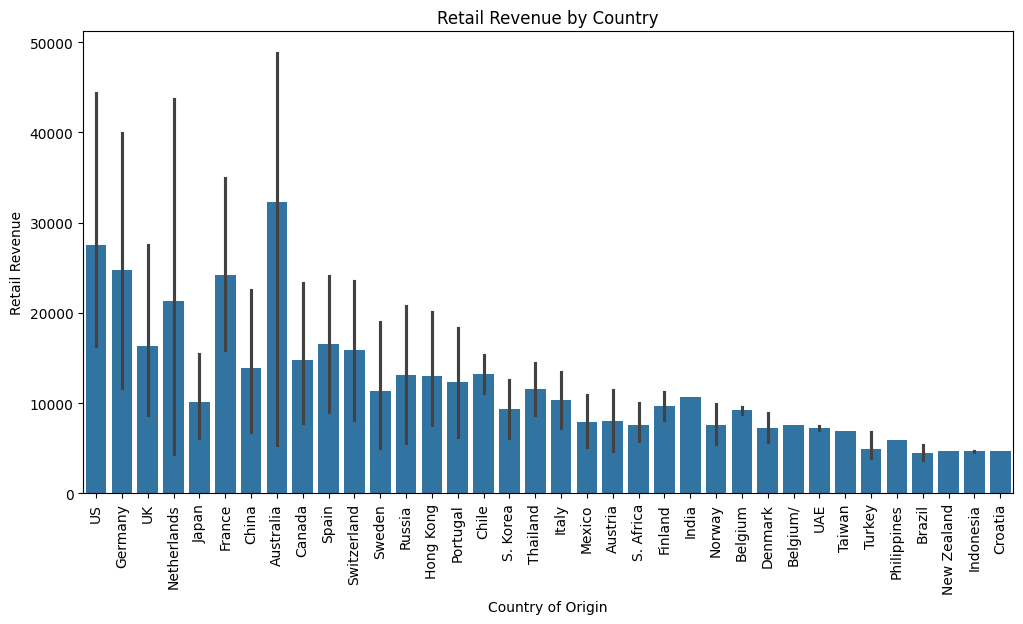

In [ ]:
# Visualization 1: Bar Chart - Retail Revenue by Country

plt.figure(figsize=(12, 6))
sns.barplot(x='country_of_origin', y='retail_revenue', data=df)
plt.title('Retail Revenue by Country')
plt.xlabel('Country of Origin')
plt.xticks(rotation = 90)
plt.ylabel('Retail Revenue')
plt.show()



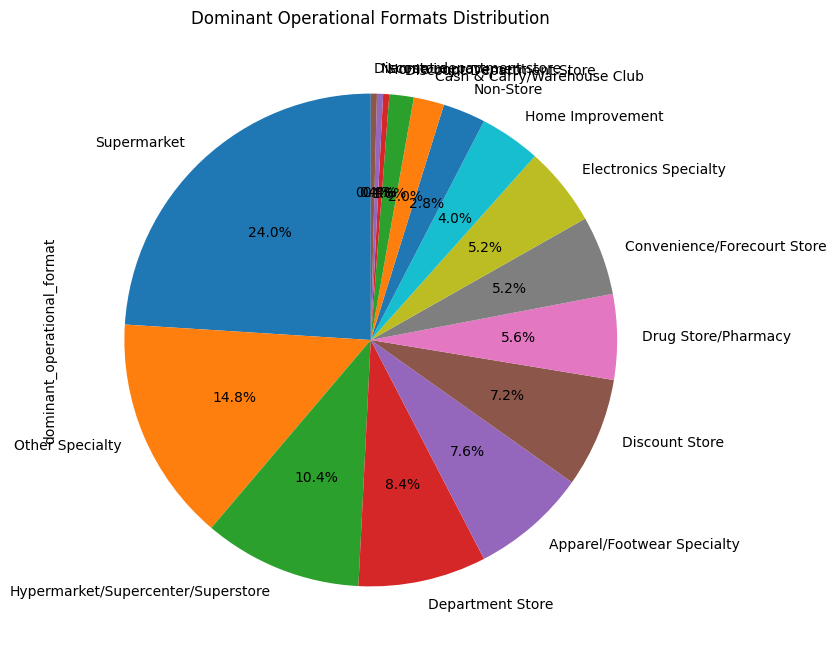

In [ ]:
# Visualization 2: Pie Chart - Dominant Operational Formats Distribution

plt.figure(figsize=(8, 8))
df['dominant_operational_format'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Dominant Operational Formats Distribution')
plt.show()


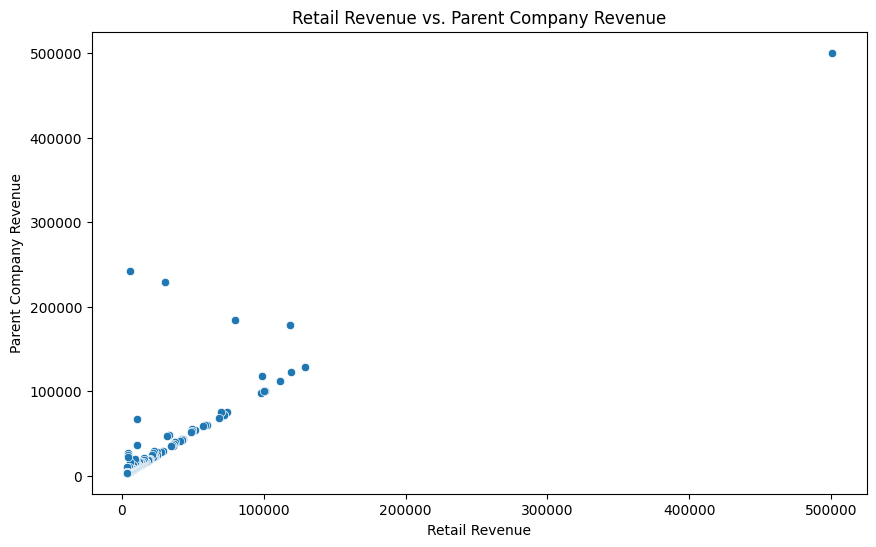

In [ ]:
# Visualization 3: Scatter Plot - Retail Revenue vs. Parent Company Revenue

plt.figure(figsize=(10, 6))
sns.scatterplot(x='retail_revenue', y='parent_company_revenue', data=df)
plt.title('Retail Revenue vs. Parent Company Revenue')
plt.xlabel('Retail Revenue')
plt.ylabel('Parent Company Revenue')
plt.show()


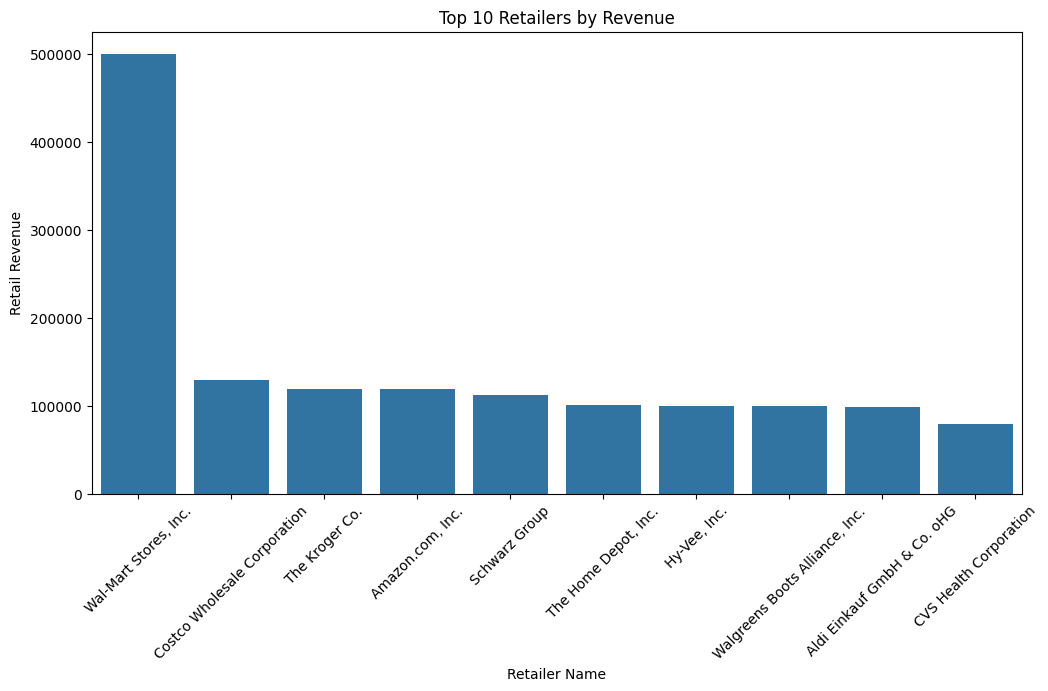

In [ ]:
# Visualization 4: Bar Chart - Top 10 Retailers by Revenue

top_retailers = df.nlargest(10, 'retail_revenue')
plt.figure(figsize=(12, 6))
sns.barplot(x='name', y='retail_revenue', data=top_retailers)
plt.title('Top 10 Retailers by Revenue')
plt.xlabel('Retailer Name')
plt.ylabel('Retail Revenue')
plt.xticks(rotation=45)
plt.show()


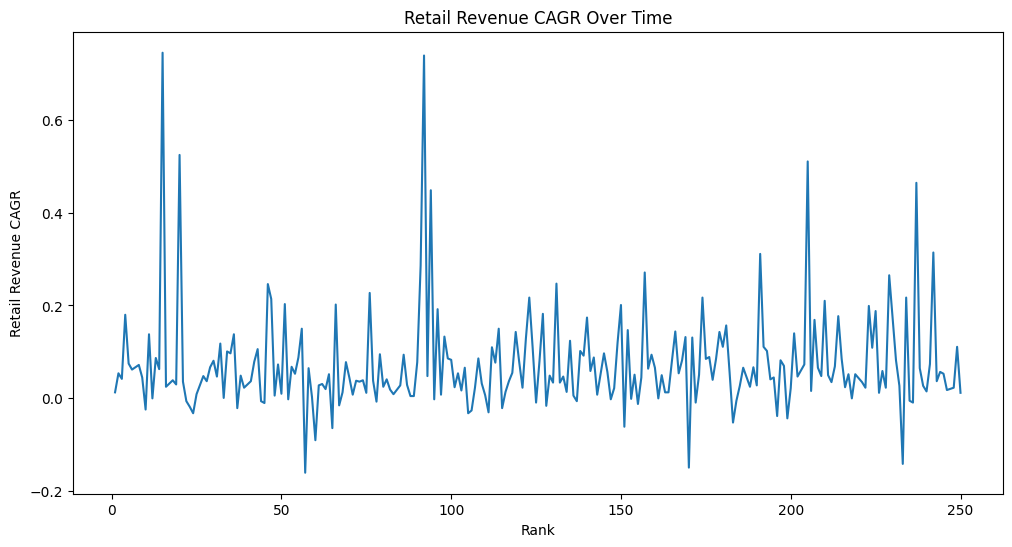

In [ ]:
# Visualization 5: Line Chart - Retail Revenue CAGR Over Time

plt.figure(figsize=(12, 6))
sns.lineplot(x='rank', y='retail_revenue_cagr', data=df)
plt.title('Retail Revenue CAGR Over Time')
plt.xlabel('Rank')
plt.ylabel('Retail Revenue CAGR')
plt.show()


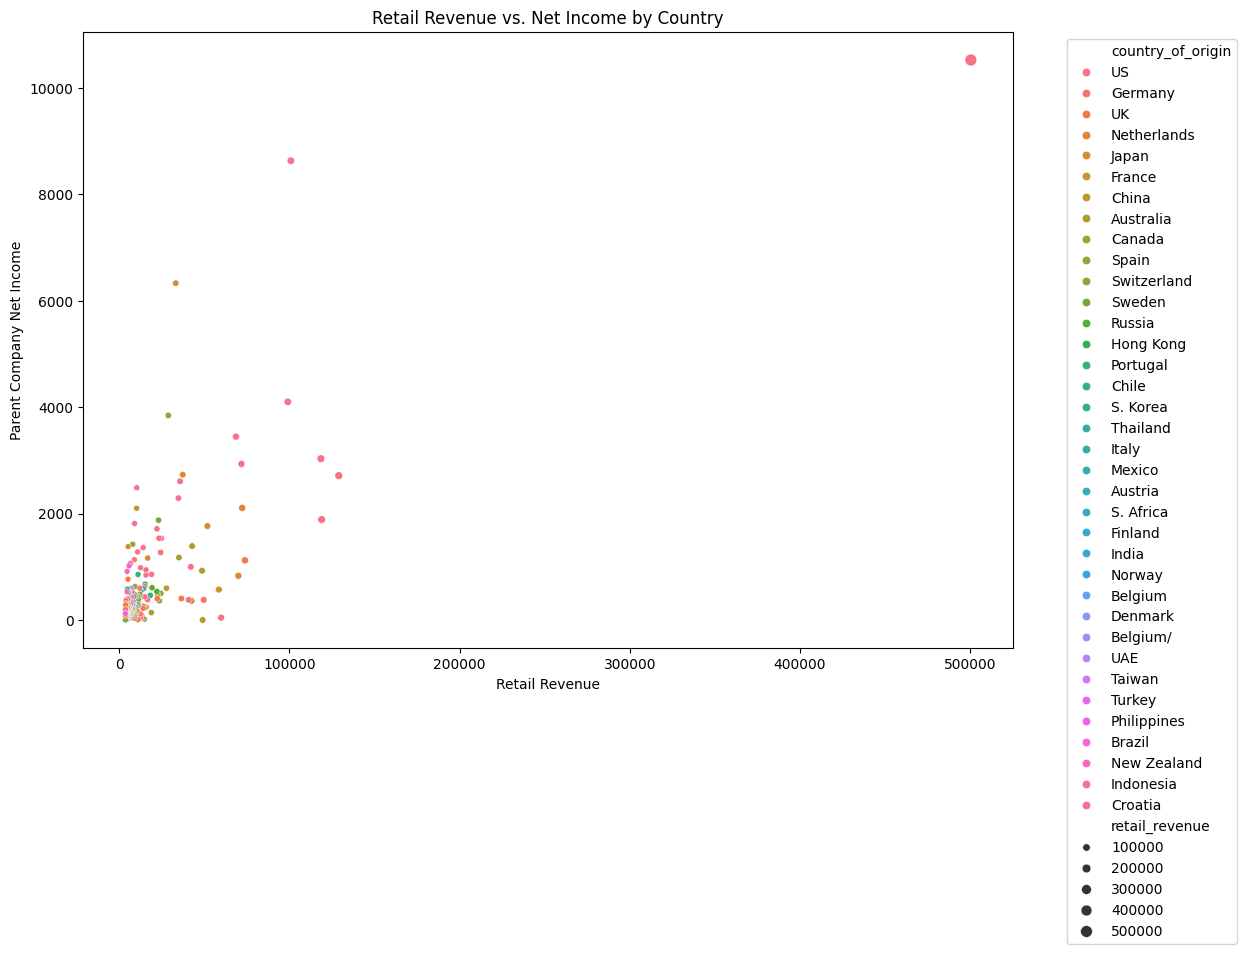

In [ ]:
# Visualization 6: Bubble Chart - Retail Revenue vs. Net Income by Country

plt.figure(figsize=(12, 8))
sns.scatterplot(x='retail_revenue', y='parent_company_net_income', size='retail_revenue', hue='country_of_origin', data=df)
# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Retail Revenue vs. Net Income by Country')
plt.xlabel('Retail Revenue')
plt.ylabel('Parent Company Net Income')
plt.show()


In [ ]:
# Visualization 7: Treemap - Countries of Operation by Retail Revenue with Improved Hover Information
fig = px.treemap(df, path=['country_of_origin'], values='retail_revenue',
                 hover_data={'country_of_origin': True, 'retail_revenue': ':,.2f'},
                 title='Countries of Operation by Retail Revenue')

# Update hover template to include country names and retail revenue information
fig.update_traces(hovertemplate='<b>%{label}</b><br>Retail Revenue: $%{value:.2f}<br>Country: %{customdata[0]}')

fig.show()


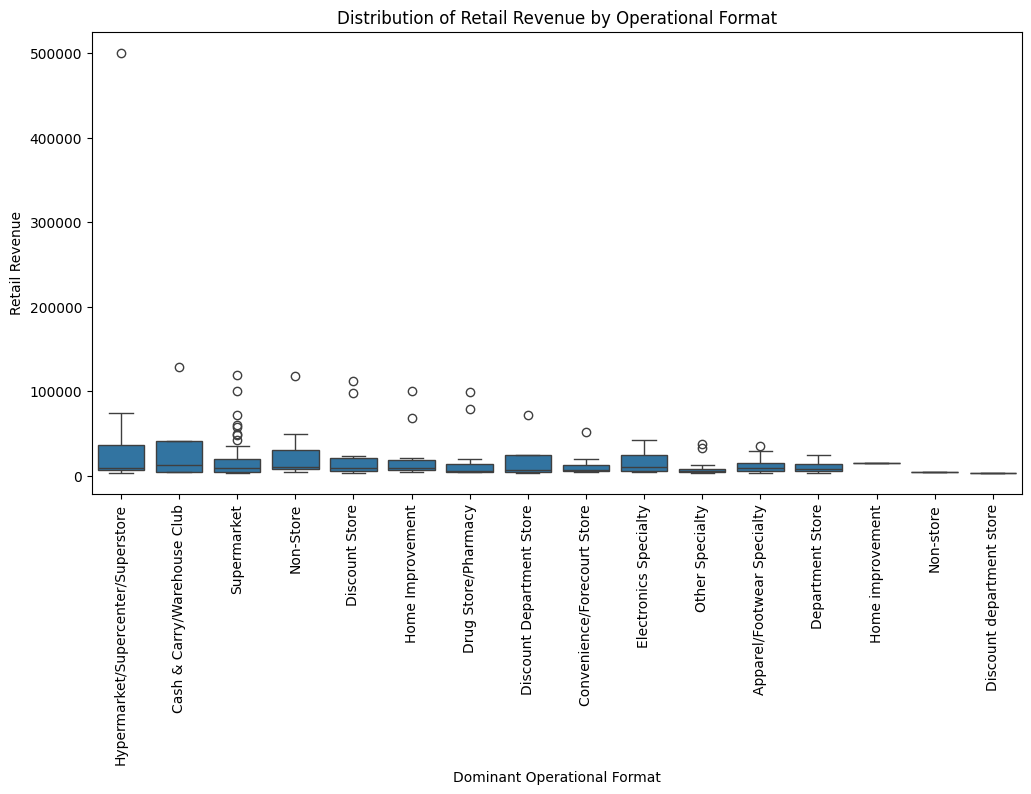

In [ ]:
# Visualization 8: Box Plot - Distribution of Retail Revenue by Operational Format

plt.figure(figsize=(12, 6))
sns.boxplot(x='dominant_operational_format', y='retail_revenue', data=df)
plt.title('Distribution of Retail Revenue by Operational Format')
plt.xlabel('Dominant Operational Format')
plt.ylabel('Retail Revenue')
plt.xticks(rotation = 90)
plt.show()


<ipython-input-27-3a2ec32b3d77>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



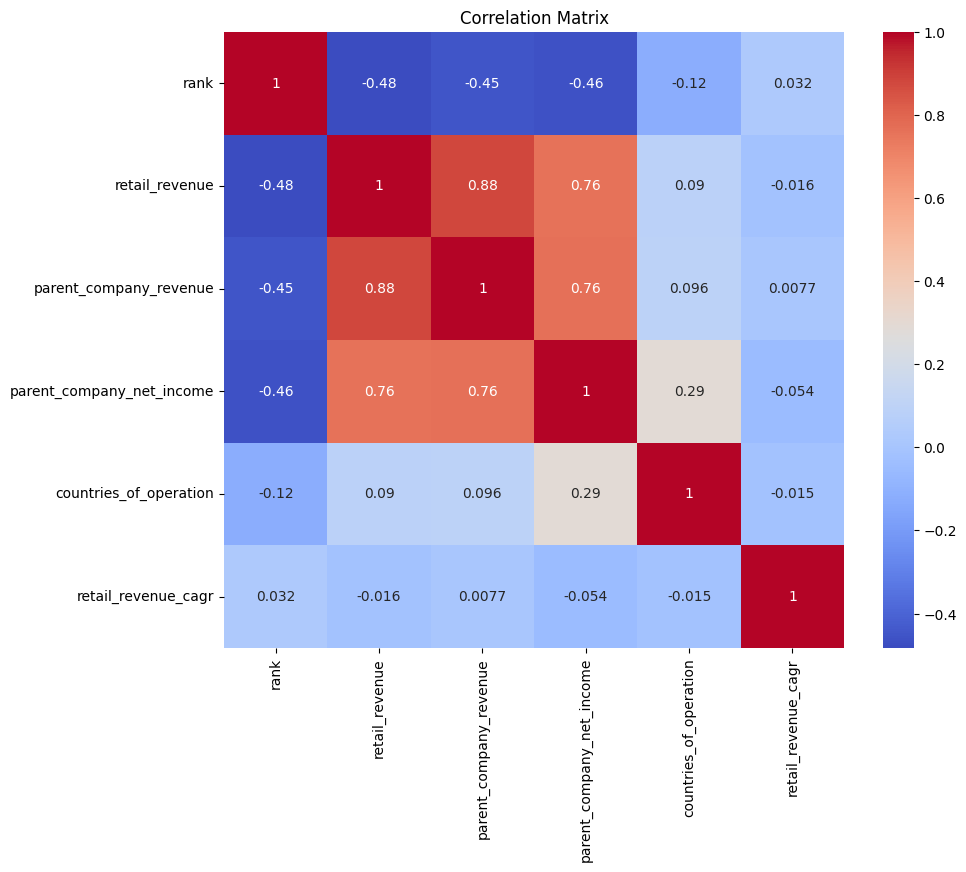

In [ ]:
# Visualization 9: Heatmap - Correlation Matrix

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Visualization 10 : choropleth map
# Convert 'retail_revenue' to string
df['retail_revenue'] = df['retail_revenue'].astype(str)

# Create choropleth map
fig = px.choropleth(df,
                    locations='country_of_origin',
                    locationmode='country names',  # This ensures that the provided names are treated as country names
                    color='retail_revenue',
                    hover_name='country_of_origin',
                    color_continuous_scale='Viridis',
                    projection='natural earth',
                    title='Retail Revenue by Country')

fig.show()


In [ ]:
# Visualization 11: Radar Chart - Operational Format Performance Across Countries

fig = px.parallel_categories(df, dimensions=['country_of_origin', 'dominant_operational_format'],
                             color='retail_revenue', color_continuous_scale=px.colors.sequential.Inferno)
fig.update_layout(title='Operational Format Performance Across Countries')
fig.show()



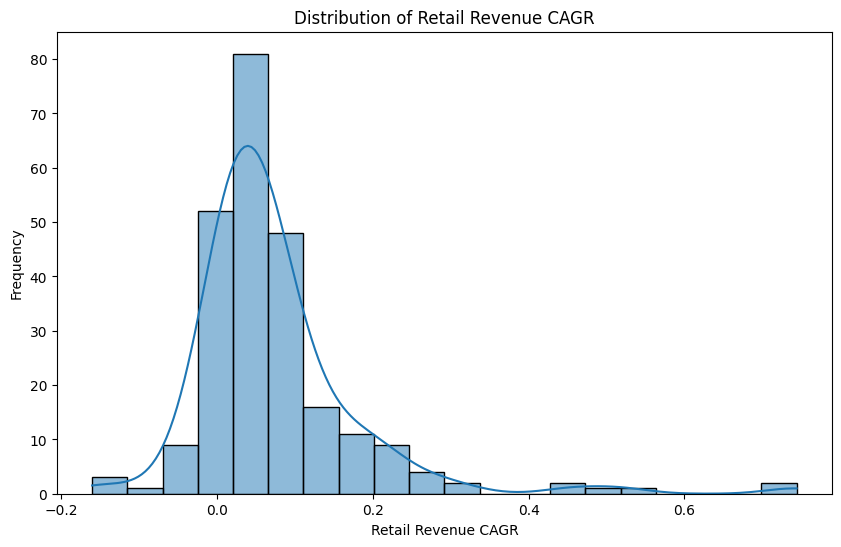

In [ ]:
# Visualization 12: Histogram - Distribution of Retail Revenue CAGR

plt.figure(figsize=(10, 6))
sns.histplot(df['retail_revenue_cagr'].dropna(), bins=20, kde=True)
plt.title('Distribution of Retail Revenue CAGR')
plt.xlabel('Retail Revenue CAGR')
plt.ylabel('Frequency')
plt.show()


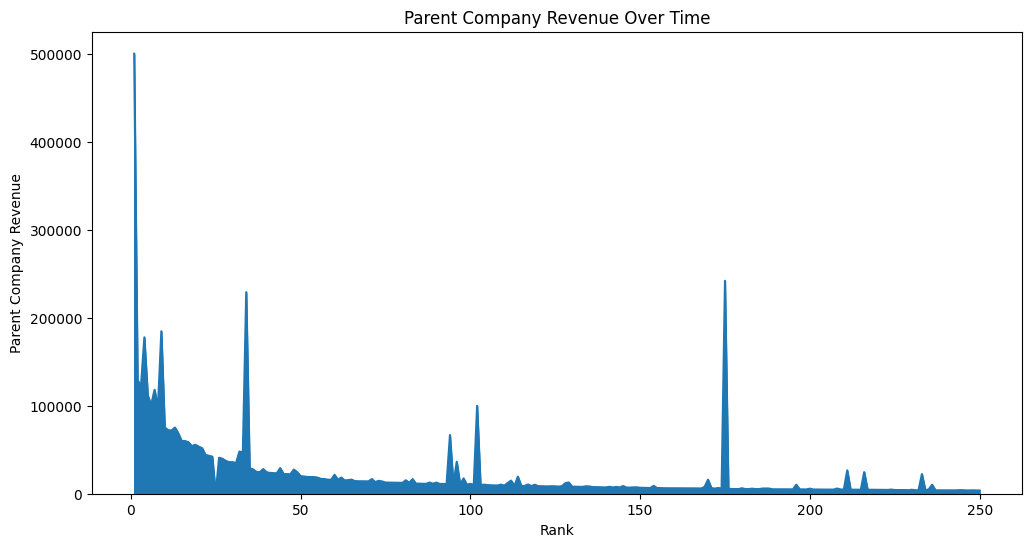

In [ ]:
# Visualization 13: Stacked Area Chart - Parent Company Revenue Over Time

plt.figure(figsize=(12, 6))
df.groupby('rank')['parent_company_revenue'].sum().plot(kind='area')
plt.title('Parent Company Revenue Over Time')
plt.xlabel('Rank')
plt.ylabel('Parent Company Revenue')
plt.show()


<Figure size 1200x800 with 0 Axes>

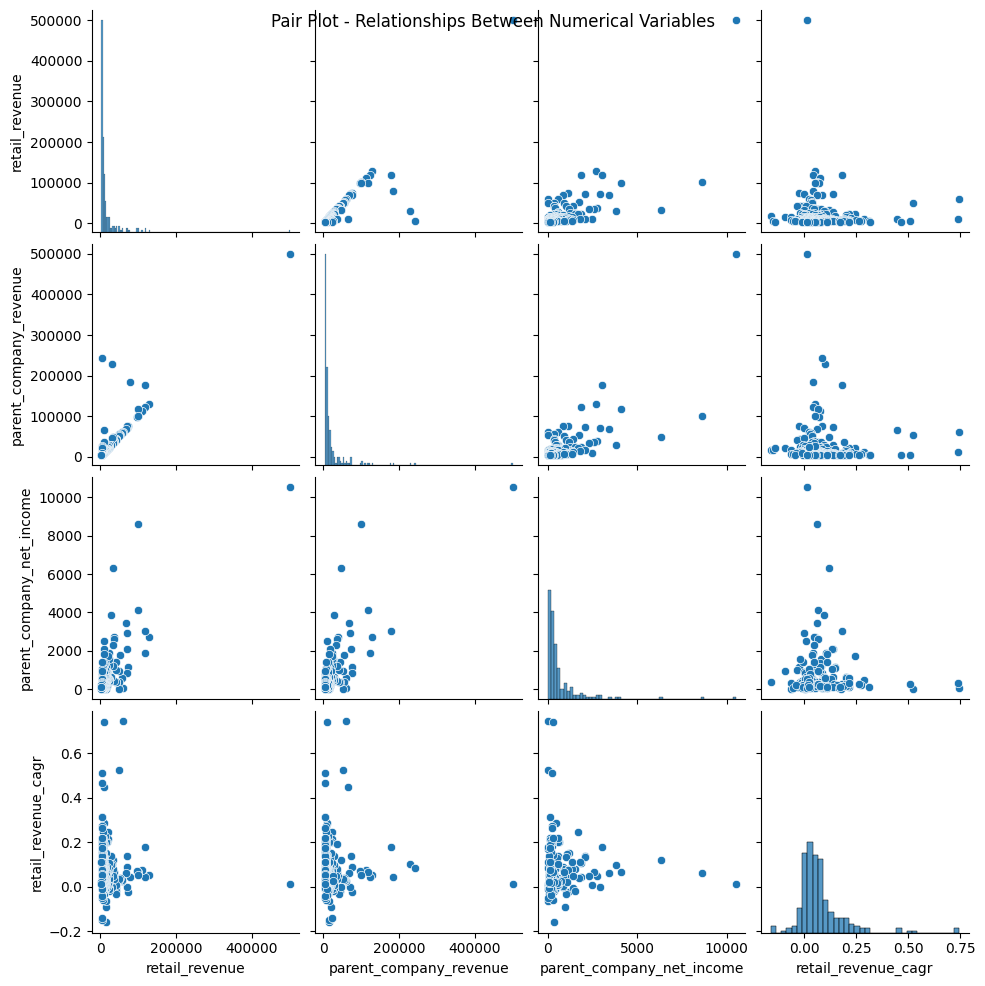

In [ ]:
#  Visualization 14 : Pair Plot - Relationships Between Numerical Variables:

plt.figure(figsize=(12, 8))
sns.pairplot(df[['retail_revenue', 'parent_company_revenue', 'parent_company_net_income', 'retail_revenue_cagr']])
plt.suptitle('Pair Plot - Relationships Between Numerical Variables')
plt.show()


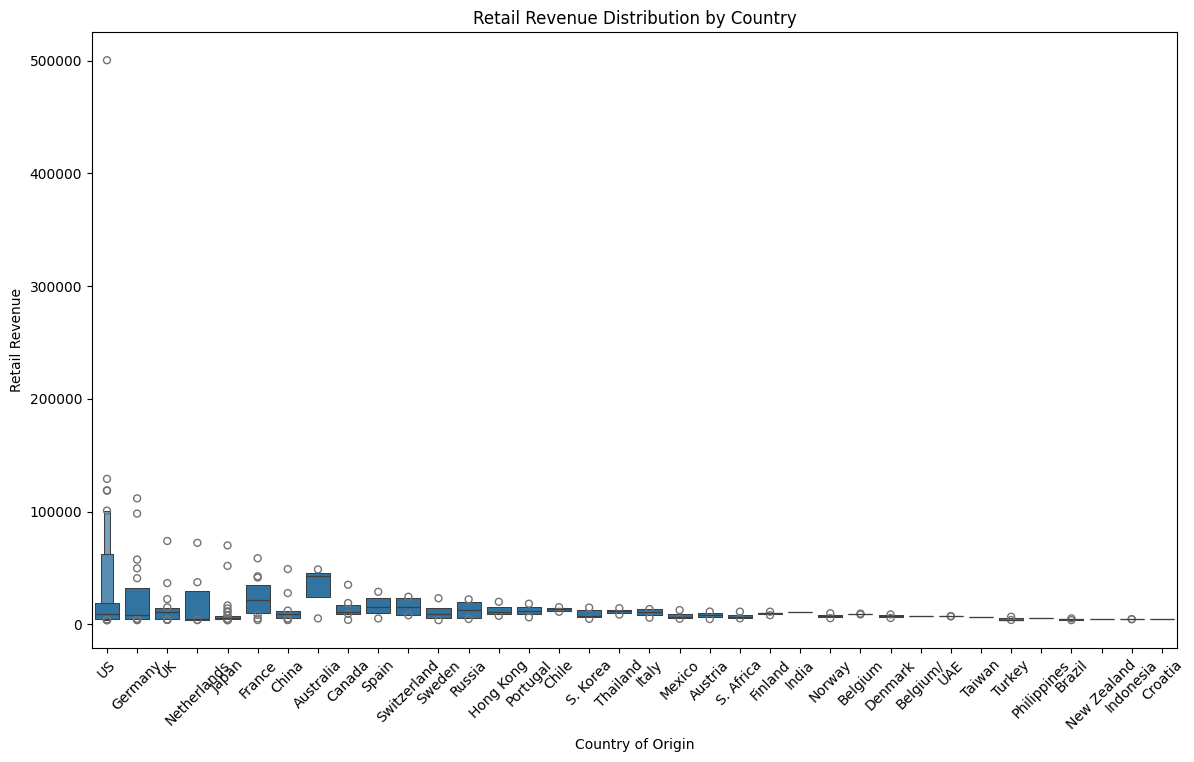

In [ ]:
#  15 : Boxen Plot - Retail Revenue Distribution by Country:
plt.figure(figsize=(14, 8))
sns.boxenplot(x='country_of_origin', y='retail_revenue', data=df)
plt.title('Retail Revenue Distribution by Country')
plt.xlabel('Country of Origin')
plt.ylabel('Retail Revenue')
plt.xticks(rotation=45)
plt.show()


<ipython-input-42-3f07738f098f>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




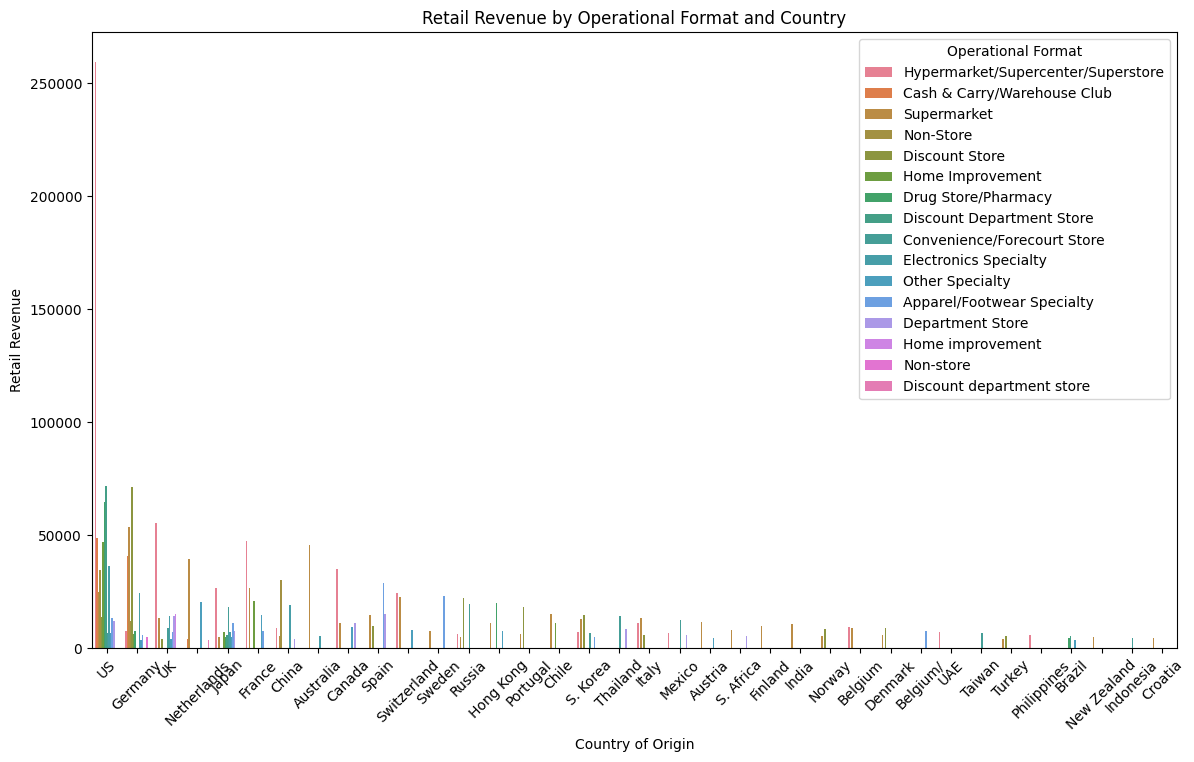

In [ ]:
# Visualization 16: Stacked Bar Chart - Retail Revenue by Operational Format and Country
plt.figure(figsize=(14, 8))
sns.barplot(x='country_of_origin', y='retail_revenue', hue='dominant_operational_format', data=df, ci=None)
plt.title('Retail Revenue by Operational Format and Country')
plt.xlabel('Country of Origin')
plt.ylabel('Retail Revenue')
plt.xticks(rotation=45)
plt.legend(title='Operational Format', bbox_to_anchor=(1, 1))
plt.show()


In [ ]:
# visualization 17 : sunburst chart

# Create hierarchical data for Sunburst chart
hierarchical_data = df.groupby(['country_of_origin', 'dominant_operational_format']).agg({'retail_revenue': 'sum'}).reset_index()

# Create Sunburst chart
fig = go.Figure(go.Sunburst(
    labels=hierarchical_data['country_of_origin'] + ' - ' + hierarchical_data['dominant_operational_format'],
    parents=[''] * len(hierarchical_data),  # Empty string as the root
    values=hierarchical_data['retail_revenue'],
))

fig.update_layout(title='Sunburst Chart - Retail Revenue Hierarchy', margin=dict(l=0, r=0, b=0, t=40))

fig.show()
